# 期末作业, 有两项选择, 请同学们二选一
* 请在6月19日17:00前，将案例分析报告交至如下链接:
* https://workspace.jianguoyun.com/inbox/collect/3df899ec9f4d4de2b72a2ed18a373551/submit
* 提交作业时，请输入学号、姓名、手机号，以便出现问题时联系。
* 若有问题，可联系我，手机：13761230790

# 选择一: 完成一篇实证研究的论文
* 具体要求:
    * 实证论文研究对象自拟(可以是自己关心的任一专业问题)
    * 要求使用到本课程学到的统计方法中的至少一种, 如: 单个样本均值推断、两个样本均值推断、方差分析、相关分析、回归分析
    * 请确保数据来源、统计方法的合理性
    * 论文格式, 可参阅使用实证类学术论文(可自行在知网检索相关论文)
    * 字数不少于2500字, 不得直接抄袭他人论文
    * 提交保存好的word文档

# 选择二: 完成一篇数据统计分析报告
* 具体要求:
    * 请分步骤完成如下各部分要求, 根据各部分完成情况给分
    * 数据分析在ipynb脚本文件中完成, 请给出计算代码, 输出运行结果(关键性统计数据,如p值), 解释所得结论(在markdown单元格中说明、或在代码单元格中用注释说明)
    * 若无特殊说明, 所有统计推断问题的显著性水平为α=0.05
    * 提交保存好的ipynb脚本文件(请确保代码可用性, 以便运行验证代码)

## 数据导入与整理
* '期末作业.xlsx'文件中包括2016-2020年间的日收益率数据, 数据列解释如下:
    * 沪深300:  沪深300指数的日收益率
    * 内地银行:  中证内地银行主题指数的日收益率
    * 浦发银行:  浦发银行股票的日收益率

* 导入excel表格数据, 参考代码如下:

* 请确保excel文件与ipynb脚本文件在同一文件夹, 否则应在代码中给excel文件名添加所在路径

In [13]:
#更新包
#!pip install statsmodels --upgrade
#!pip install statsmodels --scipy

In [1]:
import pandas as pd
population = pd.read_excel('期末作业.xlsx', index_col=0 )
population.head()

,沪深300,内地银行,浦发银行
date,,,
2016-01-04,-0.072792,-0.046348,-0.026062
2016-01-05,0.002796,0.007482,0.008955
2016-01-06,0.017391,0.007626,0.007763
2016-01-07,-0.071853,-0.040656,-0.033140
2016-01-08,0.020187,0.011841,-0.001141


In [2]:
population.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1147 entries, 2016-01-04 to 2020-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   沪深300   1147 non-null   float64
 1   内地银行    1147 non-null   float64
 2   浦发银行    1147 non-null   float64
dtypes: float64(3)
memory usage: 35.8 KB


* 从上述总体数据中产生一个随机样本, 样本容量n=100, 参考代码如下:
* 注意:
    * 为保证每位同学的样本、分析结果有差异, 请将'random_state='参数设置为自己学号的后7位; 
    * 若第7位为0, 则设置为学号的后6位, 或后5位, 或后4位(依次顺延)

In [3]:
sample = population.sample(n=100,random_state=8010111)
# 假设某同学的学号为 202125010257, random_state=参数设置为学号的后7位5010257
sample

,沪深300,内地银行,浦发银行
date,,,
2018-09-10,-0.014622,-0.004407,-0.000987
2019-09-12,0.010701,0.003925,0.004172
2018-09-18,0.019928,0.016010,0.010789
2019-09-26,-0.007740,0.014037,0.013453
2018-06-15,-0.005296,0.004313,0.007796
...,...,...,...
2017-01-23,0.002736,-0.002039,-0.001806
2016-09-06,0.006888,-0.005192,-0.004861
2016-05-04,-0.001270,-0.000204,-0.002207


## 描述性统计

* 基于总体数据, 计算上述三项资产(组合)各自的日收益率均值

In [4]:
#均值计算如下：
population.mean()

沪深300    0.000290
内地银行     0.000062
浦发银行    -0.000123
dtype: float64

* 基于总体数据, 计算上述三项资产(组合)各自的日收益率标准差(总体的标准差)

In [5]:
#总体数据的标准差如下：
population.std(ddof=0)

沪深300    0.012556
内地银行     0.011555
浦发银行     0.013243
dtype: float64

* 基于总体数据, 计算浦发银行日收益率的四分位距

In [6]:
#四分位矩计算如下：
population.浦发银行.quantile(0.75)  -  population.浦发银行.quantile(0.25)

0.012401022837360325

## 单个样本均值推断

* 基于上述抽样产生的样本数据, 使用单样本t分数检验(双尾), 推断: 浦发银行日收益率的总体均值等于0吗?

* 陈述假设
  * 原假设$H_0:μ_{浦发银行日收益率的总体均值}=0$
  * 备择假设$H_1:μ_{浦发银行日收益率的总体均值}≠0$

In [17]:
from scipy import stats
score=sample.浦发银行
n = score.count()   # 样本的容量
df = n-1   # 样本的自由度
M = score.mean()    # 样本的均值
SS = ((score-M)**2).sum()   # 样本的离差平方和
s_2 = SS/df  # 样本的方差
s_M = (s_2/n)**0.5  # 估计标准误(样本均值标准差的估计值)
t =  (M-0)/s_M    # 样本的t分数
from scipy import stats
pvalue = stats.t.cdf(x=(-t), df=df) *2  # t分数对应的p值(双尾), 左尾概率*2
print('t值为:%.6f ,p值为:%.6f'%(t,pvalue))
print('p值大于0.05,接受原假设，认为浦发银行日收益率的总体均值等于0')

t值为:0.759435 ,p值为:0.449397
p值大于0.05,接受原假设，认为浦发银行日收益率的总体均值等于0


In [8]:
# 使用scipy.stats包完成t检验, 原假设:  a.mean() - popmean= 0
from scipy import stats
stats.ttest_1samp(a=score,popmean=0) # 双尾检验

Ttest_1sampResult(statistic=0.7594352653716778, pvalue=0.4493967719210248)

In [9]:
# 使用statsmodels包完成t检验, 原假设:  score.mean() - value= 0
import statsmodels.api as sm
sm.stats.DescrStatsW(score).ttest_mean(value=0)

(0.7594352653716776, 0.4493967719210249, 99.0)

* 基于上述抽样产生的样本数据, 使用单样本t分数检验(单尾), 推断: 内地银行(组合)日收益率的总体均值大于0吗?
* 注意: 请写出原假设、备择假设, 根据备择假设设置好单尾检验方向

* 陈述假设
  * 原假设$H_0:μ_{内地银行日收益率的总体均值}≤0$
  * 备择假设$H_1:μ_{内地银行日收益率的总体均值}>0$

In [20]:
score2=sample.内地银行
n = score2.count()   # 样本的容量
df = n-1   # 样本的自由度
M = score2.mean()    # 样本的均值
SS = ((score2-M)**2).sum()   # 样本的离差平方和
s_2 = SS/df  # 样本的方差
s_M = (s_2/n)**0.5  # 估计标准误(样本均值标准差的估计值)
t =  (M-0)/s_M    # 样本的t分数
pvalue = 1- stats.t.cdf(x=t,df=df)   # t分数对应的p值(右尾)
print('t值为:%.6f ,p值为:%.6f'%(t,pvalue))
print('p值大于0.05,接受原假设，认为内地银行(组合)日收益率的总体均值小于等于0')

t值为:0.586232 ,p值为:0.279527
p值大于0.05,接受原假设，认为内地银行(组合)日收益率的总体均值小于等于0


In [21]:
# 使用scipy.stats包完成t检验, 原假设:  a.mean() - popmean ≤ 0
from scipy import stats
stats.ttest_1samp(a=score2, popmean=0, alternative='greater') 
# alternative='greater' 指定右尾检验。

Ttest_1sampResult(statistic=0.5862319750844187, pvalue=0.2795269420927815)

In [22]:
#使用statsmodels包完成t检验, 原假设:  score.mean() - value ≤ 0
import statsmodels.api as sm
sm.stats.DescrStatsW(score2).ttest_mean(value=0,alternative='larger')
# alternative='two-sided'双尾检验, 默认值
# alternative='larger' 右尾检验
# alternative='smaller' 左尾检验

(0.5862319750844185, 0.2795269420927816, 99.0)

* 基于上述抽样产生的样本数据, 计算: 沪深300(组合)日收益率总体均值的置信水平95%的置信区间.

In [29]:
# 计算估计标准误(样本均值标准差的估计值)
score3=sample.沪深300
n = score3.count()   # 样本的容量
df = n-1   # 样本的自由度
M = score3.mean()    # 样本的均值
SS = ((score3-M)**2).sum()   # 样本的离差平方和
s_2 = SS/df  # 样本的方差
s_M = (s_2/n)**0.5  # 估计标准误(样本均值的估计标准差)
alpha = 0.05 # 显著水平α=0.05,对应置信水平95%的置信区间 
t_left = stats.t.ppf(q=alpha/2,df=df)  # 左侧临界值，X小于该分位数的概率为alpha/2=0.025
M_left = M - abs(t_left) * s_M  # 置信区间的左界
M_right = M + abs(t_left) * s_M  # 置信区间的右界
print(' 沪深300(组合)日收益率总体均值的置信水平95%%的置信区间为(%.4f,%.4f)'%(M_left,M_right))

 沪深300(组合)日收益率总体均值的置信水平95%的置信区间为(-0.0033,0.0023)


In [30]:
# 使用scipy.stats包直接得到区间估计(方法1)
from scipy import stats
stats.t.interval(alpha=0.95,  # 95%的置信区间
                 loc=score3.mean(),
                 scale=score3.std(ddof=1)/score3.count()**0.5,  # 样本均值的标准差(估计标准误)
                 df=score3.count()-1
                )

(-0.0032904582514991856, 0.002329758130533685)

In [31]:
# 使用scipy.stats包直接得到区间估计(方法2)
from scipy import stats
stats.bayes_mvs(data=score3, alpha=0.95)  
# alpha=0.95, 置信水平0.95
# 返回结果第1项是总体均值的点估计、区间估计

(Mean(statistic=-0.0004803500604827504, minmax=(-0.0032904582514991856, 0.002329758130533685)),
 Variance(statistic=0.00020470631049815212, minmax=(0.0001546192542882193, 0.00027066820808181047)),
 Std_dev(statistic=0.014270734277220923, minmax=(0.012434599080316957, 0.01645199708490767)))

In [32]:
#使用statsmodels包直接得到区间估计(方法3)
import statsmodels.api as sm
sm.stats.DescrStatsW(score3).tconfint_mean(alpha=0.05)  
# alpha=0.05, 显著水平0.05、置信水平0.95, alpha参数与scipy中的定义相反

(-0.003290458251499186, 0.0023297581305336853)

## 两个样本均值推断

* 基于上述抽样产生的样本数据, 使用独立样本t检验(双尾,假设方差齐), 推断: 沪深300、内地银行的日收益率相等吗?

* 陈述假设
    * 原假设H0：沪深300日收益率均值 = 内地银行日收益率均值  ， 两个总体的均值没有差异
    * 备择假设H1：沪深300日收益率均值 ≠ 内地银行日收益率均值 ， 两个总体的均值有差异

In [33]:
group1 = sample.沪深300
group2 = sample.内地银行
n1 = group1.count()   # 样本1的个数
n2 = group2.count()
M1 = group1.mean()    # 样本1的均值
M2 = group2.mean()
SS1 = ((group1-M1)**2).sum()   # 样本1的离差平方和
SS2 = ((group2-M2)**2).sum() 
df1 = n1-1   # 样本1的自由度
df2 = n2-1 
df = df1 +df2
from scipy import stats
# 使用ppf函数返回分位数, 也即, 随机变量X小于该分位数的概率为p
X_left = stats.t.ppf(0.025,df=df)  # 左侧临界值，X小于该分位数的概率为0.025
X_right = stats.t.ppf(1-0.025,df=df)  # 右侧临界值，X小于该分位数的概率为1-0.025，X大于该分位数的概率为0.025
print('临界值为：%.3f 和 %.3f'%(X_left,X_right))
print('临界区域（拒绝域）为：X<%.3f 和 X>%.3f'%(X_left,X_right))

临界值为：-1.972 和 1.972
临界区域（拒绝域）为：X<-1.972 和 X>1.972


In [34]:
# 若原假设成立, 两个样本的联合统计量M1-M2 服从t分布:
s_p_2 = (SS1+SS2)/(df1+df2)               # 两个样本的合并方差
s_M1_M2 = (s_p_2/n1 + s_p_2/n2) **0.5     # 估计标准误
t = ((M1-M2) - 0) / s_M1_M2               #  t分数
print('t分数为%.3f'% t)

t分数为-0.654


In [38]:
print('t分数%.3f大于左侧临界值%.3f、处在临界区域（接受域）'% (t,X_left))
print('因而, 应接受原假设, 拒绝备择假设: 两个总体的均值相等')

t分数-0.654大于左侧临界值-1.972、处在临界区域（接受域）
因而, 应接受原假设, 拒绝备择假设: 两个总体的均值相等


In [42]:
# 基于t分数, 计算p值: 不需要根据显著水平α计算临界值和临界区域(拒绝域)
pvalue = stats.t.cdf(x=(t), df=df) *2  # p值：比t分数更极端的概率（双尾）
print('t值为:%.6f ,p值为:%.6f'%(t,pvalue))
print('p值大于0.05,接受原假设，认为两个总体的均值相等')

t值为:-0.653514 ,p值为:0.514183
p值大于0.05,接受原假设，认为两个总体的均值相等


In [39]:
# 使用scipy.stats包完成两个独立样本t检验, 原假设:  a.mean() - b.mean() = 0
from scipy import stats
stats.ttest_ind(a=group1,b=group2,equal_var=True)
# 默认为双尾检验
# equal_var=True 总体方差相等

Ttest_indResult(statistic=-0.6535144674295027, pvalue=0.5141828629049624)

In [40]:
#使用statsmodels包完成两个独立样本t检验, 原假设:  x1.mean() - x2.mean() = 0
import statsmodels.api as sm
sm.stats.ttest_ind(x1=group1,x2=group2, alternative='two-sided', usevar='pooled', value=0)
# alternative='two-sided' 双边检验
# usevar='pooled' 总体方差相等
# value=0 假设x1.mean() - x2.mean() = 0

(-0.6535144674295025, 0.5141828629049624, 198.0)

* 基于上述抽样产生的样本数据, 使用独立样本t检验(单尾,假设方差齐), 推断: 沪深300的日收益率大于浦发银行的日收益率吗?
* 注意: 请写出原假设、备择假设, 根据备择假设设置好单尾检验方向

* 陈述假设
    * 原假设H0：沪深300日收益率均值 ≤ 内地银行日收益率均值  
    * 备择假设H1：沪深300日收益率均值 ＞ 内地银行日收益率均值 

In [43]:
X_singal_tail = stats.t.ppf(1-0.05,df=df)  
# 右尾临界值，X小于该分位数的概率为1-0.05=0.95，X大于该分位数的概率为0.05
print('临界值为：%.3f'% X_singal_tail)
print('临界区域（拒绝域）为：X>%.3f,拒绝域在右尾(与备择假设一致)'% X_singal_tail)

临界值为：1.653
临界区域（拒绝域）为：X>1.653,拒绝域在右尾(与备择假设一致)


In [45]:
# 若原假设成立, 两个样本的联合统计量M1-M2 服从t分布:
print('t分数为%.3f, t分数小于临界值%.3f、处在临界区域（拒绝域）'% (t,X_singal_tail))
print('因而,应接受原假设,拒绝备择假设: 沪深300日收益率均值小于等于内地银行日收益率均值')

t分数为-0.654, t分数小于临界值1.653、处在临界区域（拒绝域）
因而,应接受原假设,拒绝备择假设: 沪深300日收益率均值小于等于内地银行日收益率均值


In [46]:
# 基于t分数, 计算p值: 不需要根据显著水平α计算临界值和临界区域(拒绝域)
1- stats.t.cdf(t,df=df)  # p值：是越过统计量的右尾概率（拒绝域在右侧）
# p值大于显著水平α=0.05，接受原假设

0.7429085685475187

In [47]:
# 使用scipy.stats包完成两个独立样本t检验, 原假设:  a.mean() - b.mean() ≤ 0
from scipy import stats
stats.ttest_ind(a=group1,b=group2,equal_var=True, alternative='greater')
# alternative='greater' 指定右尾检验，注意: 低版本scipy无法指定alternative参数

Ttest_indResult(statistic=-0.6535144674295027, pvalue=0.7429085685475187)

In [48]:
#使用statsmodels包完成两个独立样本t检验, 原假设:  x1.mean() - x2.mean() ≤ 0
import statsmodels.api as sm
sm.stats.ttest_ind(x1=group1,x2=group2, alternative='larger', usevar='pooled')
# alternative='larger' 右尾检验(拒绝域在右尾)
# usevar='pooled' 总体方差相等

(-0.6535144674295025, 0.7429085685475187, 198.0)

## 方差分析

* 基于上述抽样产生的样本数据, 使用Levene检验, 推断: 沪深300、内地银行、浦发银行日收益率的总体方差相等吗?(方差齐性检验)

In [50]:
from scipy import stats
group3=sample.浦发银行
stats.levene(group1, group2,group3, center='median')
# center='median' 缺省值, 基于中位数做同方差检验

LeveneResult(statistic=0.17982425709934582, pvalue=0.8355079072279369)

* 答：p值>0.05, 接受原假设： 各样本对应总体的方差相等

* 基于上述抽样产生的样本数据, 使用方差分析(单因素独立测量,假设满足方差齐的要求), 推断: 沪深300、内地银行、浦发银行日收益率的均值相等吗?
* 注意, sample为宽数据、3列

In [52]:
stats.f_oneway(group1, group2, group3) 

F_onewayResult(statistic=0.353778252861452, pvalue=0.7023260598881742)

* p值>0.05, 接受原假设： 沪深300、内地银行、浦发银行日收益率的均值相等

## 相关分析

* 基于上述抽样产生的样本数据, 计算: 沪深300、浦发银行间的皮尔逊相关系数

In [54]:
from scipy import stats
stats.pearsonr(sample.沪深300, sample.浦发银行)

(0.679240411813075, 7.972530294761262e-15)

* 答：沪深300、浦发银行间的皮尔逊相关系数为0.679240411813075

* 基于上述抽样产生的样本数据, 推断: 沪深300、浦发银行日收益率的总体相关性(总体皮尔逊相关系数是否等于0)

* 答： p值远小于预先设定的显著水平α=0.05, 拒绝原假设: 总体的相关系数$r_p≠0$, 对应总体相关，沪深300、浦发银行日收益率的总体相关性(总体皮尔逊相关系数是不等于0。

* 基于上述抽样产生的样本数据, 计算: 沪深300、浦发银行间的斯皮尔曼相关系数

In [55]:
stats.spearmanr(sample.沪深300, sample.浦发银行)

SpearmanrResult(correlation=0.5235043504350435, pvalue=2.2892257796511293e-08)

* 沪深300、浦发银行间的斯皮尔曼相关系数为0.5235043504350435。

## 回归分析

* 基于上述抽样产生的样本数据, 以"沪深300"为自变量, "浦发银行"为因变量, 构建一元线性回归模型
* 推断: "沪深300"能解释"浦发银行"日收益率的变化吗? 请根据回归结果加以说明

In [58]:
import statsmodels.formula.api as smf
result_y = smf.ols(formula = '浦发银行 ~ 沪深300', data = sample).fit()
result_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   浦发银行   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     83.94
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           7.97e-15
Time:                        09:22:27   Log-Likelihood:                 310.91
No. Observations:                 100   AIC:                            -617.8
Df Residuals:                      98   BIC:                            -612.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0015      0.001      1.341      0.183      -0.001       0.004
沪深300          0.7095      0.077      9.162      0.000       0.556       0.863
==============================================================================
Omnibus:                       33.850   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.883
Skew:                           1.357   Prob(JB):                     4.94e-15
Kurtosis:                       5.906   Cond. No.                         71.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 答：由回归结果可知，R方为0.461，且F检验显著，因此认为该回归方程是显著的，再由回归系数沪深300的t检验也是显著的，因此有理由认为沪深300"能解释"浦发银行"日收益率的变化。

* 基于上述抽样产生的样本数据, 以"沪深300"、"内地银行"为自变量, "浦发银行"为因变量, 构建多元线性回归模型
* 推断: "内地银行"日收益率不变的情况下(控制住行业因素的影响), "沪深300"能解释"浦发银行"日收益率的变化吗? 请根据回归结果加以说明

In [60]:
result_y = smf.ols(formula = '浦发银行 ~ 沪深300+内地银行', data = sample).fit()
result_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   浦发银行   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     314.7
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           3.92e-43
Time:                        09:25:55   Log-Likelihood:                 380.64
No. Observations:                 100   AIC:                            -755.3
Df Residuals:                      97   BIC:                            -747.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.001      0.464      0.643      -0.001       0.001
沪深300         -0.0550      0.059     -0.931      0.354      -0.172       0.062
内地银行           1.0229      0.060     17.153      0.000       0.905       1.141
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.292
Skew:                           0.111   Prob(JB):                        0.864
Kurtosis:                       2.855   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 答：由多元回归结果可知，调整R方为0.864，且F检验显著，因此认为该回归方程是显著的，再由回归系数沪深300的t检验可知，此时是不显著的，因此有理由认为 "内地银行"日收益率不变的情况下(控制住行业因素的影响), "沪深300"不能解释"浦发银行"日收益率的变化。

## 分析结果的改进
* 为预测浦发银行日收益率的变化, 你认为可以使用哪些数据, 使用哪些数据统计方法, 对预测结果进行改进
* 本题为开放式问题, 请列明大体思路(若有代码, 也可列出)

* 答：由于浦发银行日收益率是时间序列数据，要考虑时间序列的自相关性，应该考虑结合时间序列模型来进行预测，如ARMA模型、ARIMAX模型等。

### 计算自相关系数和偏自相关系数

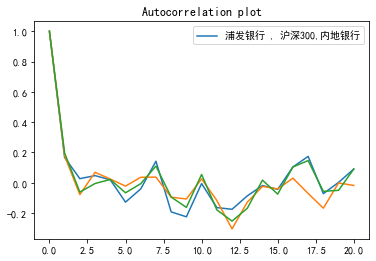

In [64]:
#计算自相关系数和画图
import statsmodels.tsa.api as sm
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False#设置负的坐标轴显示
plt.rcParams["font.family"] = "SimHei" # 设置全局中文字体为黑体
acf1=sm.acf(sample.浦发银行)
acf2=sm.acf(sample.沪深300)
acf3=sm.acf(sample.内地银行)
plt.plot(acf1)
plt.plot(acf2)
plt.plot(acf3)
plt.title("Autocorrelation plot")
plt.legend(["浦发银行 , 沪深300,内地银行"])

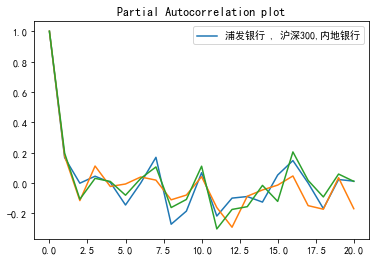

In [65]:
#计算偏自相关系数和画图
pacf1=sm.pacf(sample.浦发银行)
pacf2=sm.pacf(sample.沪深300)
pacf3=sm.pacf(sample.内地银行)
plt.plot(pacf1)
plt.plot(pacf2)
plt.plot(pacf3)
plt.title("Partial Autocorrelation plot")
plt.legend(["浦发银行 , 沪深300,内地银行"])

### 建立ARMA模型

In [73]:
import warnings
warnings.filterwarnings("ignore")
arma_models=sm.ARIMA(sample.浦发银行,order=(2,0,2)).fit()#这里是ARMA(2,2)模型
arma_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   浦发银行   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 281.378
Date:                Wed, 01 Jun 2022   AIC                           -550.755
Time:                        09:43:30   BIC                           -535.124
Sample:                             0   HQIC                          -544.429
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.533      0.594      -0.003       0.005
ar.L1         -0.0270     12.533     -0.002      0.998     -24.591      24.537
ar.L2          0.0747      1.892      0.039      0.969      -3.634       3.783
ma.L1          0.1960     12.537      0.016      0.988     -24.376      24.768
ma.L2         -0.0467      1.141     -0.041      0.967      -2.283       2.189
sigma2         0.0002   1.44e-05     14.575      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               582.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             1.66
Prob(H) (two-sided):                  0.82   Kurtosis:                        14.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 建立ARIMAX模型

In [71]:
X=sample[["沪深300","内地银行"]]
armax_models=sm.ARIMA(sample.浦发银行,X,order=(2,0,2)).fit()#这里是ARMAX(2,2)模型
armax_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   浦发银行   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 381.572
Date:                Wed, 01 Jun 2022   AIC                           -747.143
Time:                        09:41:53   BIC                           -726.302
Sample:                             0   HQIC                          -738.708
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.328      0.743      -0.001       0.001
沪深300         -0.0616      0.064     -0.964      0.335      -0.187       0.064
内地银行           1.0355      0.068     15.175      0.000       0.902       1.169
ar.L1         -0.6476      0.656     -0.987      0.323      -1.933       0.638
ar.L2         -0.5389      0.467     -1.155      0.248      -1.453       0.375
ma.L1          0.7807      0.663      1.177      0.239      -0.519       2.081
ma.L2          0.6205      0.411      1.511      0.131      -0.184       1.425
sigma2      2.832e-05   4.91e-06      5.769      0.000    1.87e-05    3.79e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.20   Prob(JB):                         0.69
Heteroskedasticity (H):               1.63   Skew:                             0.14
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* 考虑时间序列数据自身的自相关性，结合时间序列模型的预测是优于一般的线性回归的。